In [1]:
import os
import gc
import warnings

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from  pandas_profiling import ProfileReport
%matplotlib inline
# Configuration
warnings.simplefilter('ignore')
pd.options.display.max_rows = 999
sns.set_style("darkgrid")
colors = sns.color_palette('Set2')
import matplotlib.font_manager

plt.rcParams.update({'font.family':'sans-serif','font.size':14})

In [2]:
df = pd.read_csv('Sample_EDA_Dataset.csv',encoding = 'unicode_escape', engine ='python')
df = pd.DataFrame(df)

In [3]:
df.duplicated(keep=False).sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [5]:
df['Postal Code'] = df['Postal Code'].astype('object')

In [6]:
df.describe().transpose()

count          mean           std       min           25%  \
Row ID         51290.0  25645.500000  14806.291990     1.000  12823.250000   
Sales          51290.0    246.490581    487.565361     0.444     30.758625   
Quantity       51290.0      3.476545      2.278766     1.000      2.000000   
Discount       51290.0      0.142908      0.212280     0.000      0.000000   
Profit         51290.0     28.610982    174.340972 -6599.978      0.000000   
Shipping Cost  51290.0     26.375915     57.296804     0.000      2.610000   

                     50%         75%        max  
Row ID         25645.500  38467.7500  51290.000  
Sales             85.053    251.0532  22638.480  
Quantity           3.000      5.0000     14.000  
Discount           0.000      0.2000      0.850  
Profit             9.240     36.8100   8399.976  
Shipping Cost      7.790     24.4500    933.570

In [7]:
df.describe(include=object).transpose()

count unique              top   freq
Order ID         51290  25035   CA-2014-100111     14
Order Date       51290   1430       18-06-2014    135
Ship Date        51290   1464       22-11-2014    130
Ship Mode        51290      4   Standard Class  30775
Customer ID      51290   1590         PO-18850     97
Customer Name    51290    795  Muhammed Yedwab    108
Segment          51290      3         Consumer  26518
City             51290   3636    New York City    915
State            51290   1094       California   2001
Country          51290    147    United States   9994
Postal Code     9994.0  631.0          10035.0  263.0
Market           51290      7             APAC  11002
Region           51290     13          Central  11117
Product ID       51290  10292  OFF-AR-10003651     35
Category         51290      3  Office Supplies  31273
Sub-Category     51290     17          Binders   6152
Product Name     51290   3788          Staples    227
Order Priority   51290      4           Medium  29433

- ######  Country columns 147 unique values
- ###### 17 sub-category of products across 3 main categories are in the data
- ###### Purchases are processed in 4 different type of shipping mode

In [8]:
df.isnull().sum().sort_values(ascending=False)

Postal Code       41296
Row ID                0
Region                0
Shipping Cost         0
Profit                0
Discount              0
Quantity              0
Sales                 0
Product Name          0
Sub-Category          0
Category              0
Product ID            0
Market                0
Order ID              0
Country               0
State                 0
City                  0
Segment               0
Customer Name         0
Customer ID           0
Ship Mode             0
Ship Date             0
Order Date            0
Order Priority        0
dtype: int64

In [9]:
corre = df.loc[:, df.columns!='Row ID'].corr()
corre

Sales  Quantity  Discount    Profit  Shipping Cost
Sales          1.000000  0.313577 -0.086722  0.484918       0.768073
Quantity       0.313577  1.000000 -0.019875  0.104365       0.272649
Discount      -0.086722 -0.019875  1.000000 -0.316490      -0.079056
Profit         0.484918  0.104365 -0.316490  1.000000       0.354441
Shipping Cost  0.768073  0.272649 -0.079056  0.354441       1.000000

- ###### Sales have moderate positive correaltion with profit
- ###### Sales and profit have negative correlatio with discount

In [10]:
df['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

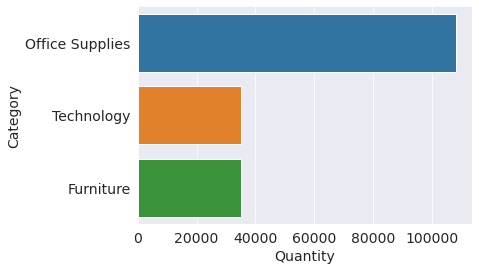

In [11]:
quant_cat = df.groupby(['Category']).Quantity.sum().sort_values(ascending=False)
sns.barplot(x=quant_cat,y=quant_cat.index)
plt.show()

#### Office supplies has more 2.5x count of sales compared to others two categories individually

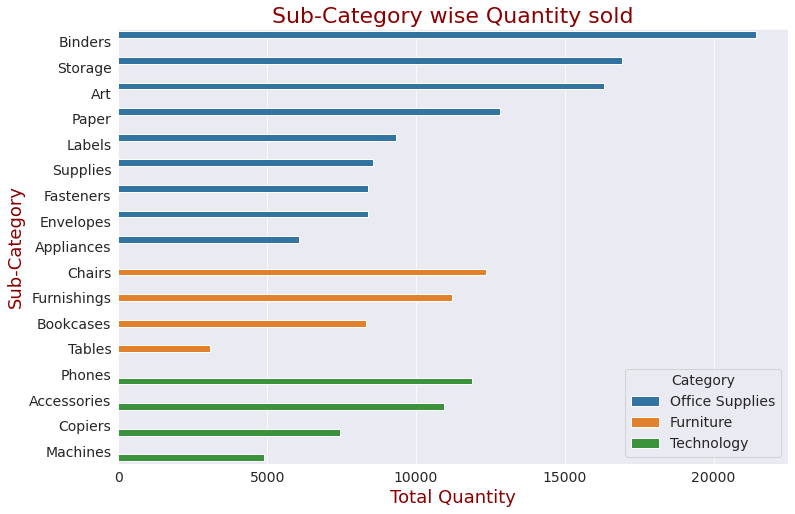

In [12]:
quant_cat_sub = df.groupby(['Category','Sub-Category']).Quantity.sum().reset_index().sort_values(by=['Category','Quantity'], ascending=[True,False], key=lambda x : x.replace({'Office Supplies':1,'Furniture':2,'Technology':3}))
plt.figure(figsize=(12,8))
sns.barplot(data=quant_cat_sub,y='Sub-Category',x='Quantity',hue='Category')
plt.title('Sub-Category wise Quantity sold',fontdict={'fontsize':22,'family':'sans serif','color':'darkred'})
plt.xlabel('Total Quantity',fontdict={'fontsize':18,'family':'sans serif','color':'darkred'})
plt.ylabel('Sub-Category',fontdict={'fontsize':18,'family':'sans serif','color':'darkred'})
plt.show()

###### From the above graph, we can see the quantity of items sold in each sub category

###### Top 2 sub categories as per quantity sold
###### 1) Office Supplies - Binders, Storage
###### 2) Furniture       - Chairs,Furnishings
###### 3) Technology      - Phones, Accessories

In [13]:
df_discount = df[df.Discount != 0]

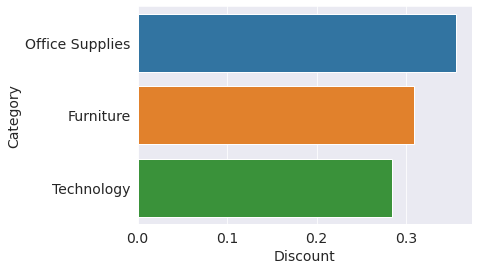

In [14]:
disc_cat = df_discount.groupby('Category')['Discount'].mean().sort_values(ascending=False)
sns.barplot(x=disc_cat,y=disc_cat.index)
plt.show()

- #### Average discount % is high for Office Supplies products

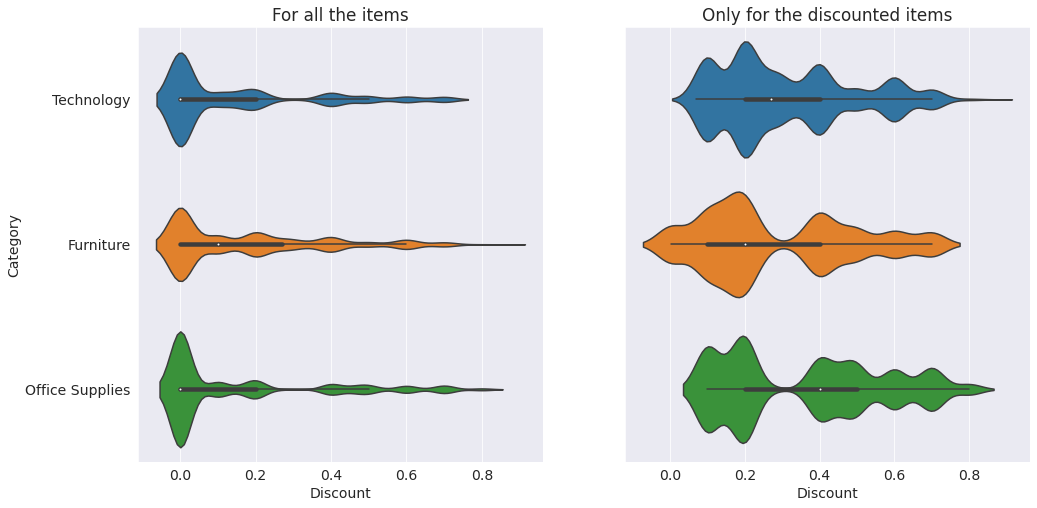

In [15]:
plt.figure(figsize=(16,8))
ax1, ax2 = plt.subplot(1,2,1), plt.subplot(1,2,2)

sns.violinplot(data=df,x='Discount',y='Category',inner='box',ax=ax1)
ax1.set_title('For all the items')
sns.violinplot(data=df_discount,x='Discount',y='Category',inner='box',ax=ax2,sharex=ax1)
ax2.set_title('Only for the discounted items')
ax2.set_yticks([])
ax2.set_ylabel('')

plt.show()

##### for all the categories 
###### 1) Purchases with 0 % discount are high
###### 2) and for the discounted purchases, median discount is 20%

- ###### For office supplies, we can see distribution at around 80% which is the max
- ###### For technology, thers are some items discounted between 20% to 40%
- ###### Furnitures have a wide range of discounts available

In [16]:
print(df.iloc[df_discount.Discount.idxmax()][['Segment','Category','Sub-Category','Quantity','Discount','Profit']])

Segment         Home Office
Category          Furniture
Sub-Category         Tables
Quantity                  4
Discount               0.85
Profit            -1924.542
Name: 5321, dtype: object


##### The max discount of 85% was provided for a 4 items Furniture for tables purchase which resulted in a loss of $1924

In [17]:
def sales_profit(col,filter_col=None,filter_condition=None,n=5):
    
    if (filter_col == None) | (filter_condition == None):
        new_df = df
        a = ''
    else:
        new_df = df[df[filter_col]==filter_condition]
        a = 'In {} as {},'.format(filter_col,filter_condition)
    
    print('Sales Contribution by {}\n'.format(col))
    print(new_df[col].value_counts().head(10))
    
    fig = plt.figure(figsize=(16, 12))
    gs = fig.add_gridspec(nrows = 2, ncols = 4,  width_ratios=(2, 2, 2, 2), height_ratios=(2, 2),
                          left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.8, hspace=0.2)
    font_title ={'fontsize':20,'family': 'sans-serif','color':  'darkred','weight': 'normal','size': 20}

    ax_pie = fig.add_subplot(gs[0, 1:3])
    sales = (new_df.groupby(col).Sales.sum().sort_values(ascending=False)*100/new_df.Sales.sum())
    if len(sales) > 10:
        sns.barplot(x=sales.head(15),y=sales.head(15).index,ax=ax_pie)
        ax_pie.set_title('{} \nTop 15 Revenue contributing {}'.format(a,col),)#fontdict=font_title)
    elif len(sales) > 5:
        ax_pie.pie(sales,autopct='%.2f%%',textprops={'fontsize':16,'color':'white'})
        ax_pie.set_title('{} \nRevenue contribution by {}'.format(a,col),)#fontdict=font_title)
        ax_pie.legend(bbox_to_anchor=(1,1))
    else:
        ax_pie.pie(sales,autopct='%.2f%%',labels=sales.index,textprops={'fontsize':16,'color':'white'})
        ax_pie.set_title('{} \nRevenue contribution by {}'.format(a,col),)#fontdict=font_title)
        ax_pie.legend(bbox_to_anchor=(1,1))
    

    ax_sales = fig.add_subplot(gs[1,:2])
    avg_sales = (new_df.groupby(col).Sales.mean().sort_values(ascending=False))#.head(5)
    sns.barplot(x=avg_sales.values,y=avg_sales.index)
    ax_sales.set_title('Average Revenue per purchase by {}'.format(col),)#fontdict=font_title)
    ax_sales.set_xlabel('Revenue')

    ax_profit = fig.add_subplot(gs[1,2:])
    avg_profit = (new_df.groupby(col).Profit.mean().sort_values(ascending=False))#.head(5)
    sns.barplot(x=avg_profit.values,y=avg_profit.index)
    ax_profit.set_title('Average Profit per purchase by {}'.format(col),)#fontdict=font_title)
    ax_profit.set_xlabel('Profit')
    ax_profit.set_ylabel('')

    plt.show()

Sales Contribution by Region

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Name: Region, dtype: int64


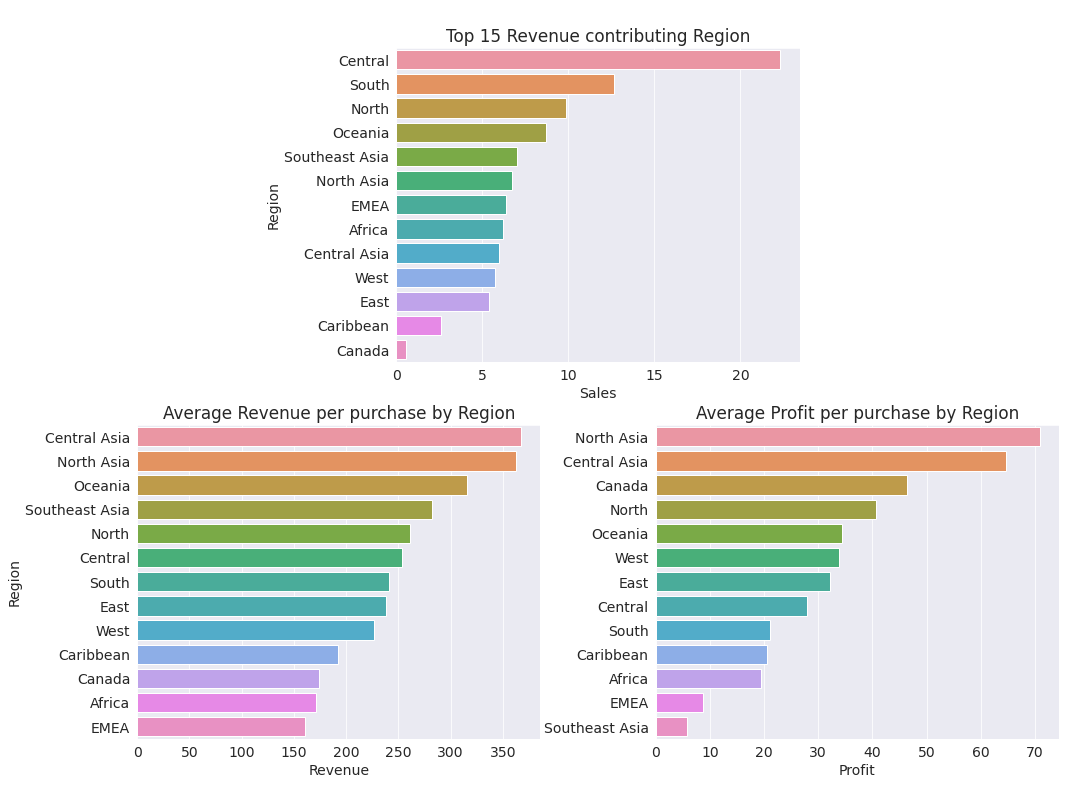

In [18]:
sales_profit(col='Region')

##### Inference:
- ###### Central and South regions contribute to 50% of the revenue
- ###### Southeast Asia region produce significantly low average profit per purchase. Further research needs to be done

Sales Contribution by Category

Office Supplies    1773
Furniture           687
Technology          669
Name: Category, dtype: int64


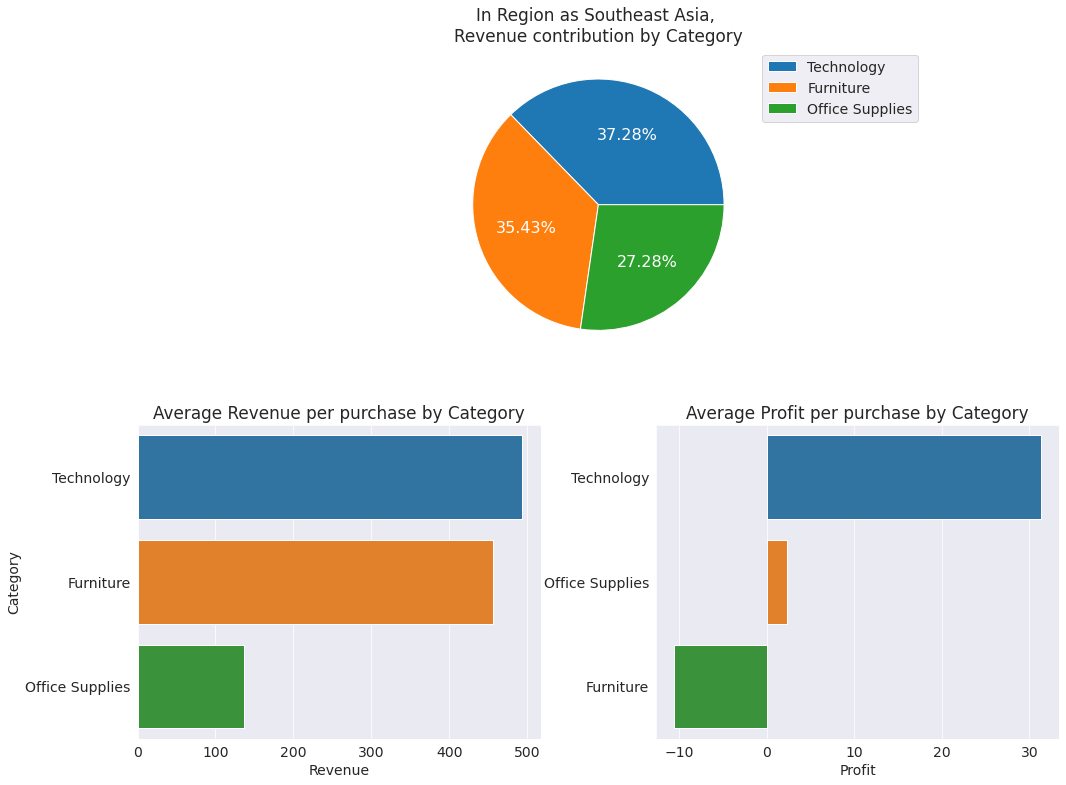

In [20]:
sales_profit(col='Category',filter_col='Region',filter_condition='Southeast Asia')

###### On further analysis, it is found that furniture business in Southeast Asia 
###### Furniture business contributing for 27% of the market share is in loss leading to significant drop in profit

#### State wise Analysis

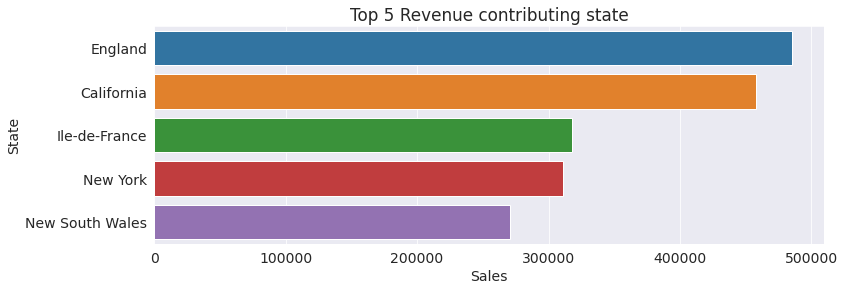

In [22]:
tot_sales_state = (df.groupby('State').Sales.sum().sort_values(ascending=False))
plt.figure(figsize=(12,4))
sns.barplot(x=tot_sales_state.head(),y=tot_sales_state.head().index)
plt.title('Top 5 Revenue contributing state')
plt.show()

#### Which city yields high sales and profit?

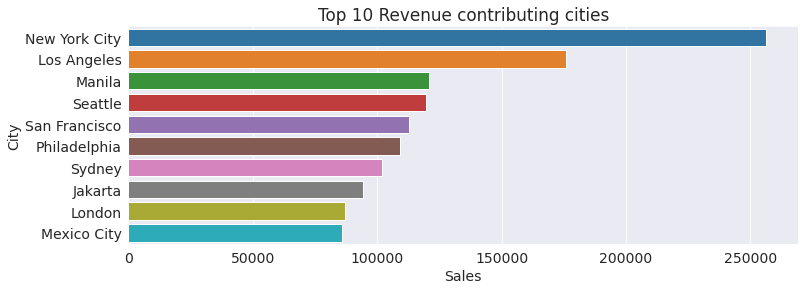

In [24]:
tot_sales_city = (df.groupby('City').Sales.sum().sort_values(ascending=False))
plt.figure(figsize=(12,4))
sns.barplot(x=tot_sales_city.head(10),y=tot_sales_city.head(10).index)
plt.title('Top 10 Revenue contributing cities')
#plt.savefig('top_rev_city.png')
plt.show()

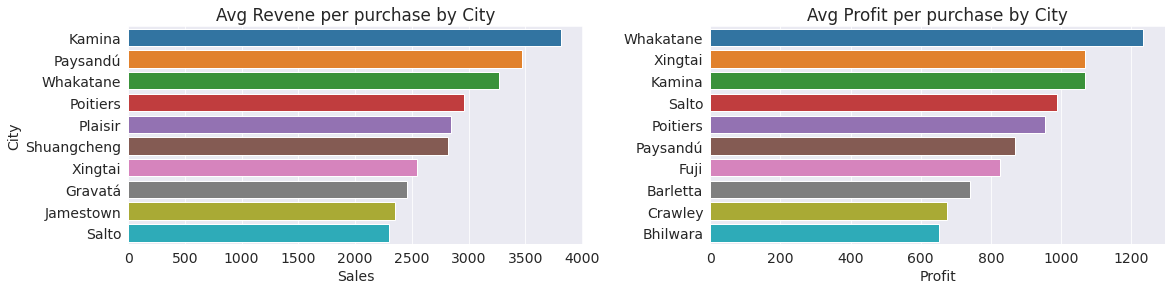

In [25]:
sales_city = (df.groupby('City').Sales.mean().sort_values(ascending=False))
profit_city = (df.groupby('City').Profit.mean().sort_values(ascending=False))

fig = plt.figure(figsize=(16, 4))
gs = fig.add_gridspec(nrows = 1, ncols = 2,  width_ratios=(2, 2),  left=0.05, right=0.95, wspace=0.28)

ax_rev = fig.add_subplot(gs[0, 0])
sns.barplot(x=sales_city.head(10),y=sales_city.head(10).index,ax=ax_rev)
ax_rev.set_title('Avg Revene per purchase by City')

ax_pro = fig.add_subplot(gs[0, 1])
sns.barplot(x=profit_city.head(10),y=profit_city.head(10).index,ax=ax_pro)
ax_pro.set_title('Avg Profit per purchase by City')
ax_pro.set_ylabel('')

plt.show()

##### Inference :
- ######  Major revenue generating cities are New York, Los Angeles, Manila,Seattle, San Francisco and Phildelphia
- ######  Whakatane, Xingtai, kamina, Salto seems to be a good market to target

#### Does ship mode has relation with sales and profit?

Sales Contribution by Ship Mode

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64


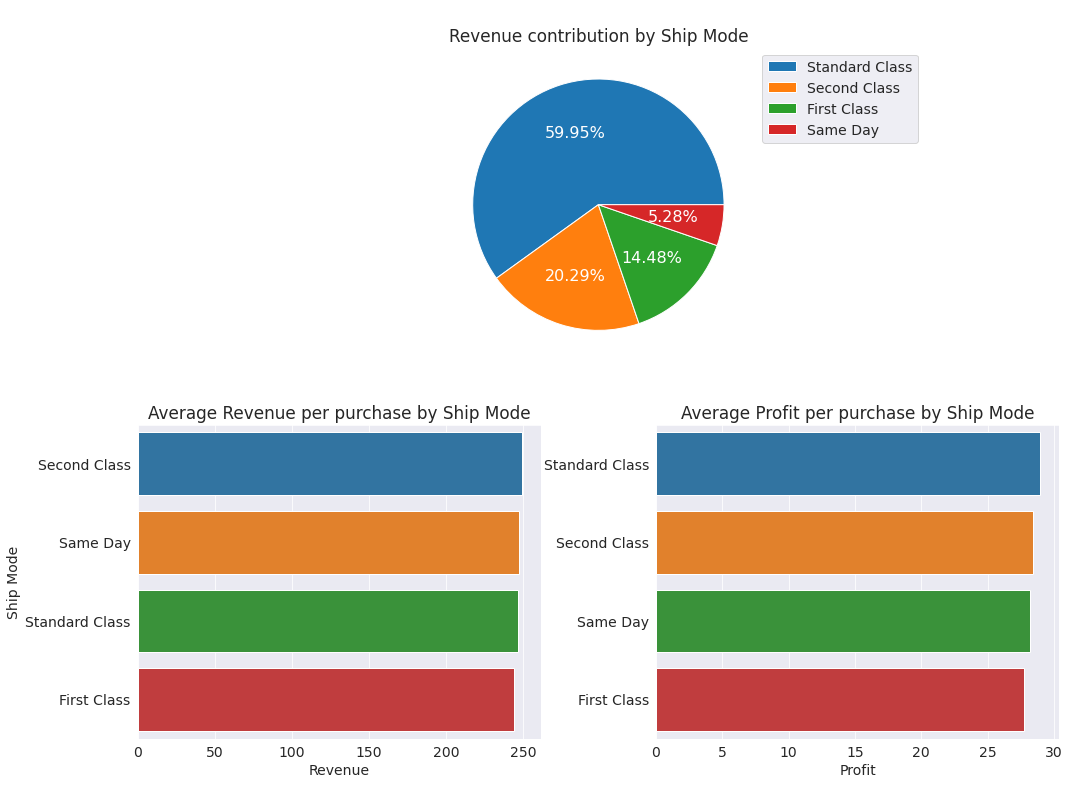

In [26]:
sales_profit('Ship Mode')

##### Inference :
- ###### Standard Class is the dominant Shipping mode of Sales but has the less contribution to average revenue
- ###### Same day is the minority of the Shipping modes accounting for 5% but has the highest average revenue per purchase
- ###### First Class shipping mode has the minimum average profit per purchase but margins are close

#### Which segment provides high sales and profit?

Sales Contribution by Segment

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64


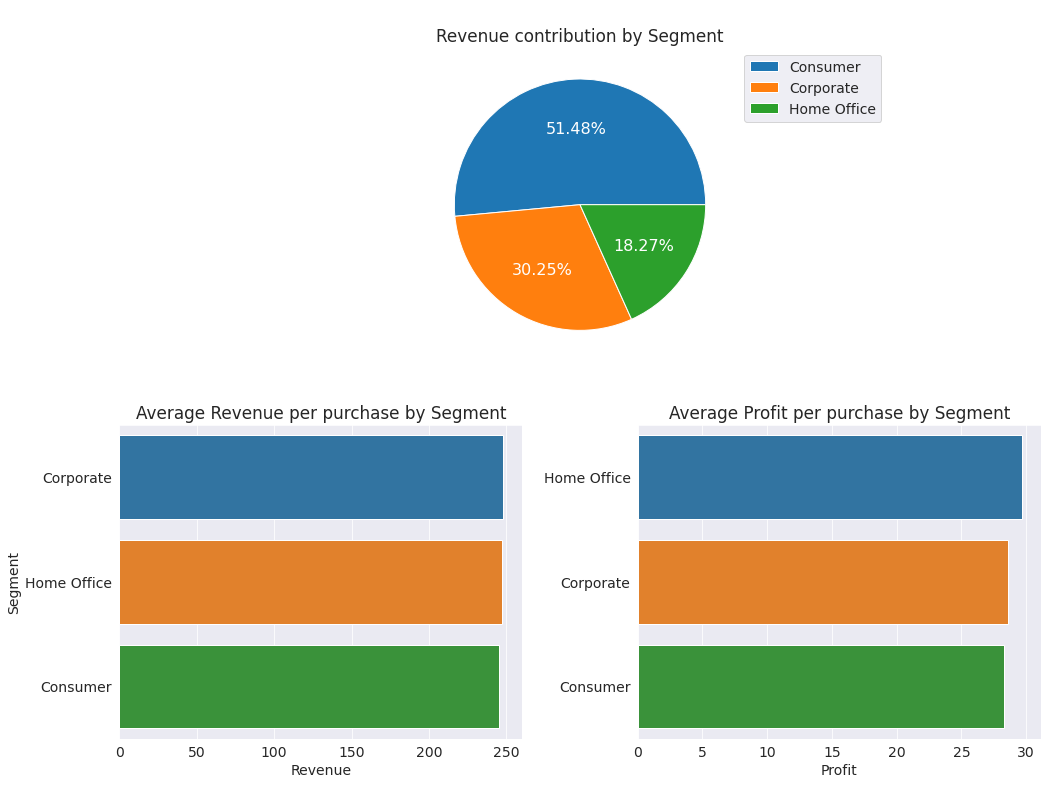

In [27]:
sales_profit('Segment')

##### Inference :
- ###### We have more sales in 'Consumer' segment but with least average revenue and profit per purchase compared
- ###### 'Home office' has the highest average revenue and profit per purchase

#### Which category yields high sales and profit?

Sales Contribution by Category

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64


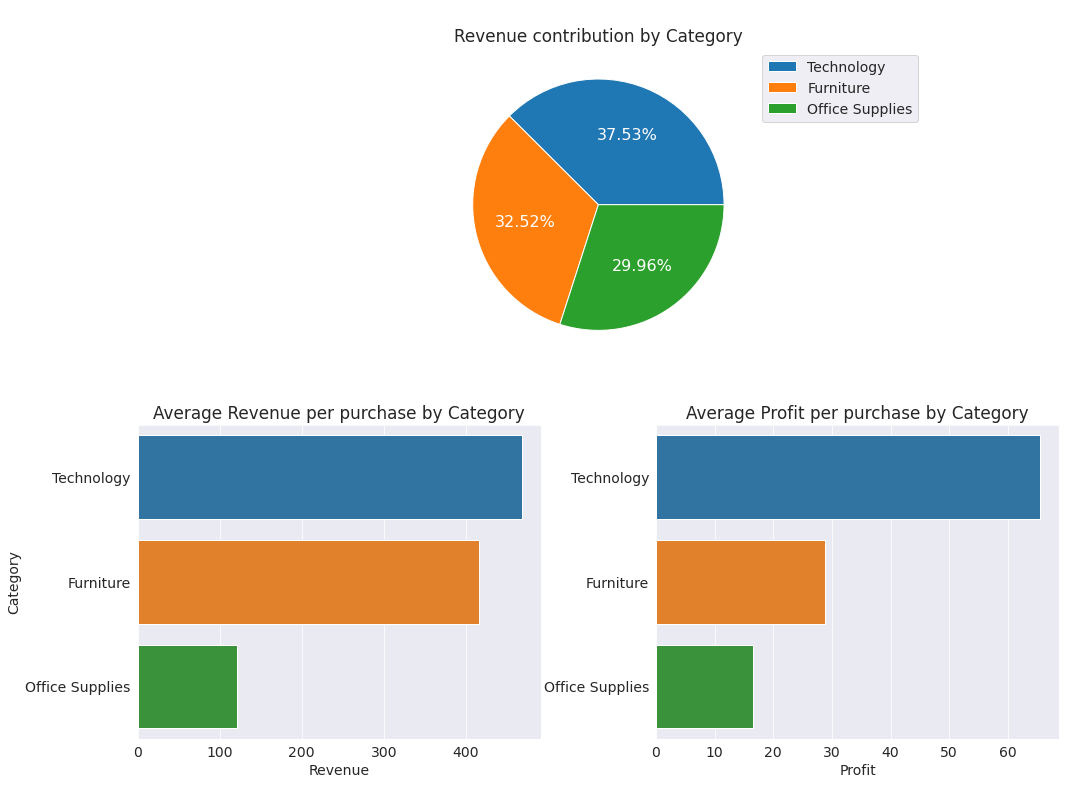

In [28]:
sales_profit('Category')

##### Inference :
- ###### Revenue contribution for Technology is highest
- ###### Technology leads with higher avg sales and profit per purchase compare to Office supplies
- ###### Furniture category purchases yields the least avg profit

#### In Technology, Which sub-category yields high sales and profit?

Sales Contribution by Sub-Category

Phones         3357
Accessories    3075
Copiers        2223
Machines       1486
Name: Sub-Category, dtype: int64


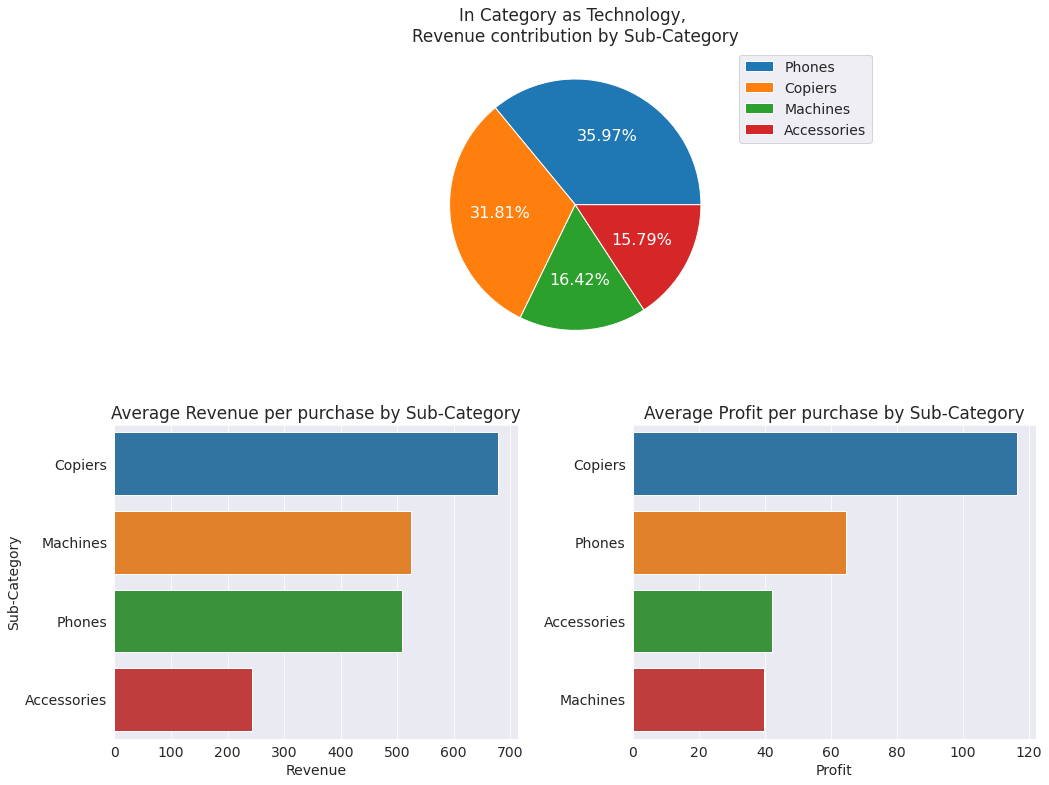

In [29]:
sales_profit(col='Sub-Category',filter_col='Category',filter_condition='Technology')

##### Inference :
- ###### Phones are the frequently purchased technology in the store
- ###### Surprisingly, Selling a unit of copier gives almost 10 times more profit than selling a unit product from any other sub category in Technology

#### Conclusion
##### Important Inferences are:

- In 'Southeast Asia', the **furniture** business is in loss and it is a concern to be addressed
- Company gets high revenue from popular cities such **New York, Los Angeles, Manila,Seattle**, but small cities such as **Whakatane, Xingtai,Salto** shows promise with high average revenue and profit per purchase
- **Technology** products give the best average profit per purchase
- In technology related products, **'copier'** gives **10x profit** compared with any other sub category
- Company should promote **'Second Class'** shipping modes for better revenue and profit per purchase

In [4]:
import cufflinks

In [7]:
aggregated_df= df.groupby(pd.Grouper(key="Category")).aggregate(aggregated_value=("Quantity", "sum")).reset_index()
aggregated_df

Category  aggregated_value
0       Technology             35176
1        Furniture             34954
2  Office Supplies            108182

In [9]:
fig = aggregated_df.iplot(kind="bar", asFigure=True, 
                        x="Category", y="aggregated_value")
fig

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("your_report.html")